In [1]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from IPython.display import display 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

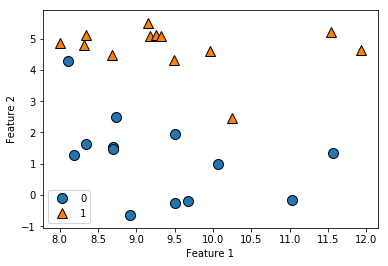

In [2]:
#import dataset to use for classification 
X,y = mglearn.datasets.make_forge()
#scatterplot of data 
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [3]:
#m is the number of training examples
m = (X[:,1]).size
#create a column of ones and add it to the X-matrix 
col_ones = np.ones((m,1))
X_new = np.append(col_ones,X,axis=1)
#n is the number of features 
n = len(X_new[1,:])
#convert labels y to a matrix- this makes matrix computations easier 
y_new = np.asmatrix(y).transpose()
#create Theta matrix which will serve as our parameters we will learn, initialized with all zeros 
Theta = np.zeros((n,1))
#Create Theat_Temp vector to store Theta updates 
Theta_Temp = np.zeros((n,1))
#create empty matrix J_history- this will be used to keep track of the cost during gradient descent 
J_history = np.zeros((1,25))

In [4]:
#create sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [5]:
#create a function that will compute the cost given a choice of parameters Theta 
def ComputeCost(X,y,theta):
    J = 0
    for i in range(0,m):
        J = J+((-y[i]*np.log(sigmoid(np.dot(X[i,:],theta))))-(1-y[i])*(np.log(1-sigmoid(np.dot(X[i,:],theta)))))/m

In [6]:
#set our step size alpha 
alpha = 0.10
#Gradient Descent step-The first for loop will be for the number of iterations, the second for loop computes the gradeint and 
#updates our parameters Theta.. This will also keep track of the Cost at each iteration
for iter in range(0,25):
    for i in range(0,n):
        Theta_Temp[i] = Theta[i]-(alpha*(1./m)*np.dot(((sigmoid(np.dot(X_new,Theta))-y_new).transpose()),X_new[:,i]))
    Theta = Theta_Temp
    J_history[0,iter] = ComputeCost(X_new,y_new,Theta)

In [7]:
#Create array of zeros that will contain our predicted values 
predictions = np.zeros((y_new.size,1))

In [8]:
#Now that we have our optimal Theta this function makes predictions for each training example and classifies them
def predict(X,y,theta):
    for i in range(0,m):
        if(sigmoid(np.dot(X[i,:],theta))>=0.5):
            predictions[i] = 1
        else:
            predictions[i] = 0

In [9]:
#Call the predict function with our data 
predict(X_new,y_new,Theta)

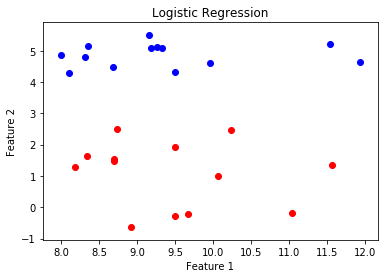

In [10]:
#This for loop goes over all our training data and plots each blue or red based on their predicted classes 0 and 1 respectively
for i in range(0,m):
    if(predictions[i]==1):
        plt.scatter(X[i,0],X[i,1],color='blue')
    else:
        plt.scatter(X[i,0],X[i,1],color = 'red')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression")
plt.show()

In [11]:
#Here we compute our Training rate accuracy and see our classifier predicted 92.3% of our training data correctly 
from fractions import Fraction
count=0
for i in range(0,m):
    if(predictions[i]==y_new[i]):
        count+=1
print("Training Score: {:.5f}%".format(float(Fraction(count,m))*100))

Training Score: 92.30769%


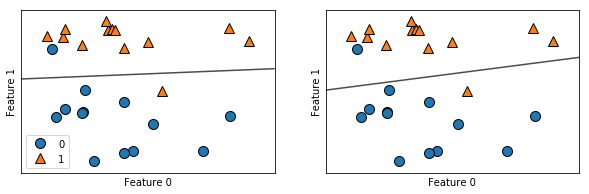

In [12]:
#Train models using logistic regression and linear SVM from sklearn 
fig, axes = plt.subplots(1, 2, figsize=(10,3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    #ax.set_title("{}".format(clf._class_._name_))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()
plt.show()

In [44]:
#trained model using logistic regression without regularization
logreg=LogisticRegression().fit(X,y)

In [45]:
#We can see our training score is the same score we got training our classifier using gradient descent 
print("Training Score (sklearn): {:.5f}%".format(logreg.score(X,y)*100))
from fractions import Fraction
count=0
for i in range(0,m):
    if(predictions[i]==y_new[i]):
        count+=1
print("Training Score (gradient descent): {:.5f}%".format(float(Fraction(count,m))*100))

Training Score (sklearn): 92.30769%
Training Score (gradient descent): 92.30769%
